In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)


In [3]:
# 위에 몇개 보기
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 구성보기
print(data.nunique())
print('##################')
print(data['Sepal length'].unique)

Sepal length    35
Sepal width     23
Petal length    43
Petal width     22
labels           3
dtype: int64
##################
<bound method Series.unique of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal length, Length: 150, dtype: float64>


In [5]:
# 대표값 보기
data.describe()

,Sepal length,Sepal width,Petal length,Petal width,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# 간단한 시각화
## 공식문서 참조하거나 하면 더 많은 자료가 있음
## seaborn distplot 만 기억하고 있음

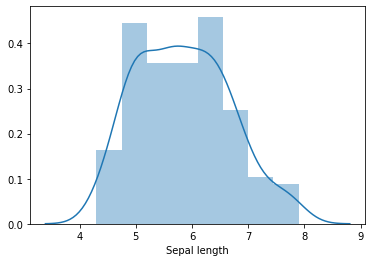

In [7]:
## 분포
sns.distplot(data['Sepal length'])

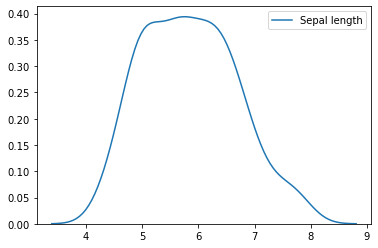

In [8]:
## bar없이
sns.kdeplot(data['Sepal length'])

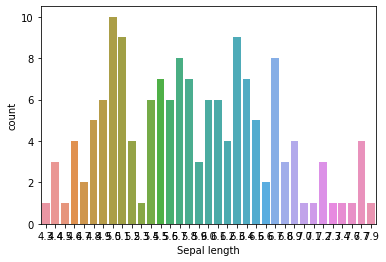

In [9]:
sns.countplot(data['Sepal length'])

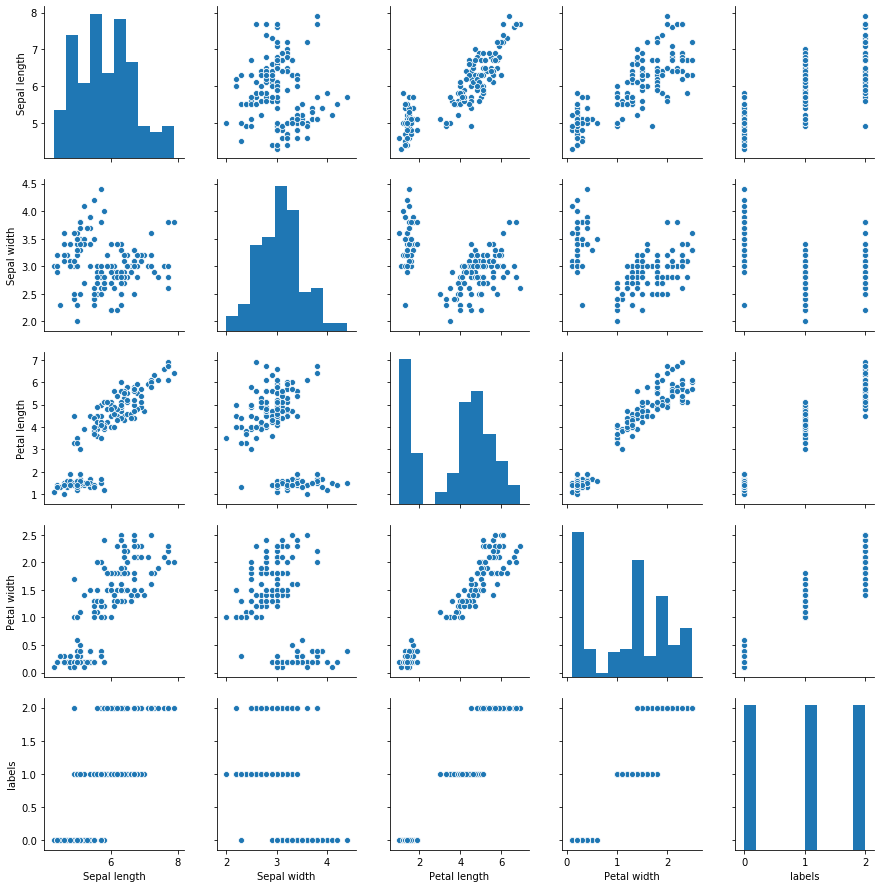

In [10]:
sns.pairplot(data)
## hue="species"로 범주형자료 지정가능

In [11]:
# scaler
## 머신러닝에서 단위 등의 이유로 표준화 하는 경우가 자주 있음
## 정규화하는 방법, 0~1사이로 놓는 방법이 자주 사용

## 직접구현 방법에 대해서 논의해 보자

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = StandardScaler()
minmax = MinMaxScaler()

std_new = std.fit_transform(data)
minmax_new = minmax.fit_transform(data)

std_new = pd.DataFrame(std_new, columns=data.columns)
minmax_new = pd.DataFrame(minmax_new, columns=data.columns)

print('std')
print(std_new.head())
print('\n')
print('minmax')
print(minmax_new.head())

std
   Sepal length  Sepal width  Petal length  Petal width    labels
0     -0.900681     1.019004     -1.340227    -1.315444 -1.224745
1     -1.143017    -0.131979     -1.340227    -1.315444 -1.224745
2     -1.385353     0.328414     -1.397064    -1.315444 -1.224745
3     -1.506521     0.098217     -1.283389    -1.315444 -1.224745
4     -1.021849     1.249201     -1.340227    -1.315444 -1.224745


minmax
   Sepal length  Sepal width  Petal length  Petal width  labels
0      0.222222     0.625000      0.067797     0.041667     0.0
1      0.166667     0.416667      0.067797     0.041667     0.0
2      0.111111     0.500000      0.050847     0.041667     0.0
3      0.083333     0.458333      0.084746     0.041667     0.0
4      0.194444     0.666667      0.067797     0.041667     0.0


In [13]:
std_new.describe()

,Sepal length,Sepal width,Petal length,Petal width,labels
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16,-1.421085e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,-1.224745e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,-1.224745e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,0.000000e+00
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,1.224745e+00
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,1.224745e+00


In [14]:
minmax_new.describe()

,Sepal length,Sepal width,Petal length,Petal width,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.500000
std,0.230018,0.181611,0.299203,0.317599,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
## 직접 구현 포인트 ##
### map 함수 및 표준화 과정

In [16]:
# 일부 간결형
data2 = data.copy()
target = ['Sepal length', 'Sepal width']
data2[target] = pd.DataFrame(std.fit_transform(data2[target]))

data2.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,-0.900681,1.019004,1.4,0.2,0
1,-1.143017,-0.131979,1.4,0.2,0
2,-1.385353,0.328414,1.3,0.2,0
3,-1.506521,0.098217,1.5,0.2,0
4,-1.021849,1.249201,1.4,0.2,0


In [17]:
# 범주형 자료
## 범주형 자료: 크기가 없는 자료 ex) 성별, 종류
## 이런 값들은 종종 변수명으로 표시되어있어서 이를 변환할 필요가 있음

In [18]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
sample = ['남', '여', '여', '남']

res = lb.fit_transform(sample)
print(res)

[0 1 1 0]


In [19]:
## 구현 포인트 ##
### 그동안 알고리즘 했던 것을 생각해 보자!! ###

# CV(cross validation)

- 모형 성능평가, 과적합 방지를 위한 모수 추정 등에 핵심이 되는 컨셉
- 핵심 내용은 평가할 자료를 모형을 구성할 때 사용하지 않는다!!
  
  
- LOOCV(하나빼고 전부로 모델링), k-fold(데이터를 k등분) 등이 있음
  
  
- CV관련해서는 앞으로 거의 모든 모델링에 사용하여 코딩해 볼 예정

#### 예제 sudo(LOOCV)  
for i in len(data):  
--- modeling_data = data[-i, :]  
--- reg = make_regression(modeling_data)  
--- predict = reg(data[i, target])  
--- loss = (predict - data[i, target]) ** 2  
--- total_loss += loss  
--- params[i] = params of reg